In [ ]:
"""
!python -m pip install upgrade pip
!python -m pip install pymysql --user
"""

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt 
import pymysql
from psw import psw
from enum import Enum
import matplotlib.dates as mdates
from datetime import datetime

linkedin = "linkedin"
kijiji = "kijiji"
careerjet = "careerjet"

class Source(Enum):
    LINKEDIN = "b"
    CAREER = "r"
    KIJIJI = "y"


def get_data(datalist,pk):
    for ds in datalist:
        if ds[0] == pk:
            return ds[1]
    return None

def get_all_data():
    cursor = db.cursor()
    cursor.execute("SELECT id,data FROM myDashboard_data_dump")
    res = cursor.fetchall()
    return res
    
def map_source(link):    
    if linkedin in link:
        return Source.LINKEDIN.value
    elif careerjet in link:
        return Source.CAREER.value
    elif kijiji in link:
        return Source.KIJIJI.value
    else:
        return 0
    

def enumerate_link(link):
    if not link in links:
        links.append(link)       
        

def load_data_dump():
    res = defaultdict(list)
    cursor = db.cursor()
    cursor.execute("SELECT id, source, time from myDashboard_data_dump")
    dump = cursor.fetchall()
    
    for ds in dump:
        enumerate_link(ds[1])
        
    count = 0
    for ds in dump:
        link = ds[1]
        source = map_source(link)
        res["pk"].append( ds[0] )
        res["link"].append( links.index(link) )
        res["timesaved"].append( ds[2] )
        res["source"].append( map_source(link) )
        res["label"].append( Source(map_source(link)).name )
        count += 1 
    print(str(count) + " lines loaded \n")
    return res

print( "connecting to server...\n")
db = pymysql.connect("colarietitosti.info","cola", psw(),"dashDB" )
print("connected!\n")
links = []

print("downloading data...")
start = datetime.now()
data = get_all_data()
dd = load_data_dump()
end = datetime.now()
print("data loaded in ", end="")
print(end-start)

print( "\ndisconnecting from server.. ")
db.close()

connecting to server...

connected!

downloading data...
16947 lines loaded 

data loaded in 0:01:17.925677

disconnecting from server.. 


In [24]:
from bs4 import BeautifulSoup

kijiji = "https://www.kijiji.it/"
careerjet = "https://www.careerjet.it/"
linkedin = "https://it.linkedin.com/"

count = 0
start = datetime.now()
data_for_plot = defaultdict(list)
for pk,t,l,s,lab in zip(dd["pk"], dd["timesaved"], dd["link"], dd["source"], dd["label"]):
    html = get_data(data,pk)
    soup = BeautifulSoup(html, "html.parser")
    
    if kijiji in links[l]:
        searchres = soup.find("ul", id="search-result")
        for li in searchres.find_all("li"):
            loc = li.find("p", class_="locale")
            if loc is None:
                continue
            a = li.find("a", class_="cta")
            title = a.text.strip()
            link = a["href"]
            data_for_plot[lab].append(link)
            data_for_plot[lab].append(t)    
            data_for_plot[lab].append(s)
            data_for_plot[lab].append(title)
            continue
            
    elif careerjet in links[l]:
        divs = soup.find_all("div", class_="job display-new-job clickable")
        for div in divs:
            title_div = div.find("a", class_="title-company")
            try:
                title = title_div.text        
            except AttributeError:
                continue
            
    elif linkedin in links[l]:
        title = soup.find("h1").text
        
    data_for_plot[lab].append(l)
    data_for_plot[lab].append(t)    
    data_for_plot[lab].append(s)
    data_for_plot[lab].append(title)
    if count % 50 == 0 and count != 0:
        print("#", end="")
    if count % 110 == 0 and count != 0:
        print("")
    count += 1
    
filename = "data_dump.csv"
  

end = datetime.now()
print(end-start)
    

###############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################


##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
#

##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
##############################################################################################################
######0:09:18.320608


[]
['Firmware Developer ambito R&D', 'Firmware Developer ambito R&D', 'Firmware Developer ambito R&D', 'Firmware Developer ambito R&D', 'Firmware Developer ambito R&D', 'Firmware Developer ambito R&D', 'Firmware Developer ambito R&D', 'Firmware Developer ambito R&D', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATORE DELPHI', 'PROGRAMMATO

['Sviluppatore C# - C# Programmer', 'progettista meccanico senior(Rif: UT1221)', 'PROPOSAL MANAGER EFFICIENZA ENERGETICA \\xe2\\x80\\x93 MODALITA\\xe2\\x80\\x99 ESCO', 'Sistemsita Middle', 'Software Engineer', 'Tecnico collaudatore macchinari in cantiere', 'Software Architect', '.NET Senior Software Engineer', 'SVILUPPATORI JR PER PROGETTI VOCALI E IoT', 'Programmatore senior', 'Regional Sales  Manager (Germany)', 'Sales Engineer', 'Software Engineer  5G', 'Software Engineer', 'Ufficio Tecnico Costruzioni Manutenzioni', 'ISS Penetration Tester', 'Senior Penetration Tester', 'Sviluppatore/trice front\\xe2\\x80\\x93end Web', 'ISMS Auditor', 'Consulenza tecnica', 'Sistemista - IT Technical Support presso Philip Morris', 'HR ORGANIZATION & DEVELOPMENT SPECIALIST', 'Responsabile di Laboratorio ed Innovazione', 'Technical Product Manager - $100k/year USD - JobID #3335', 'Software Architect - $100k/year USD - JobID #3335', 'Sviluppatore C# - C# Programmer', 'progettista meccanico senior(Rif: 

TypeError: 0 is not a string

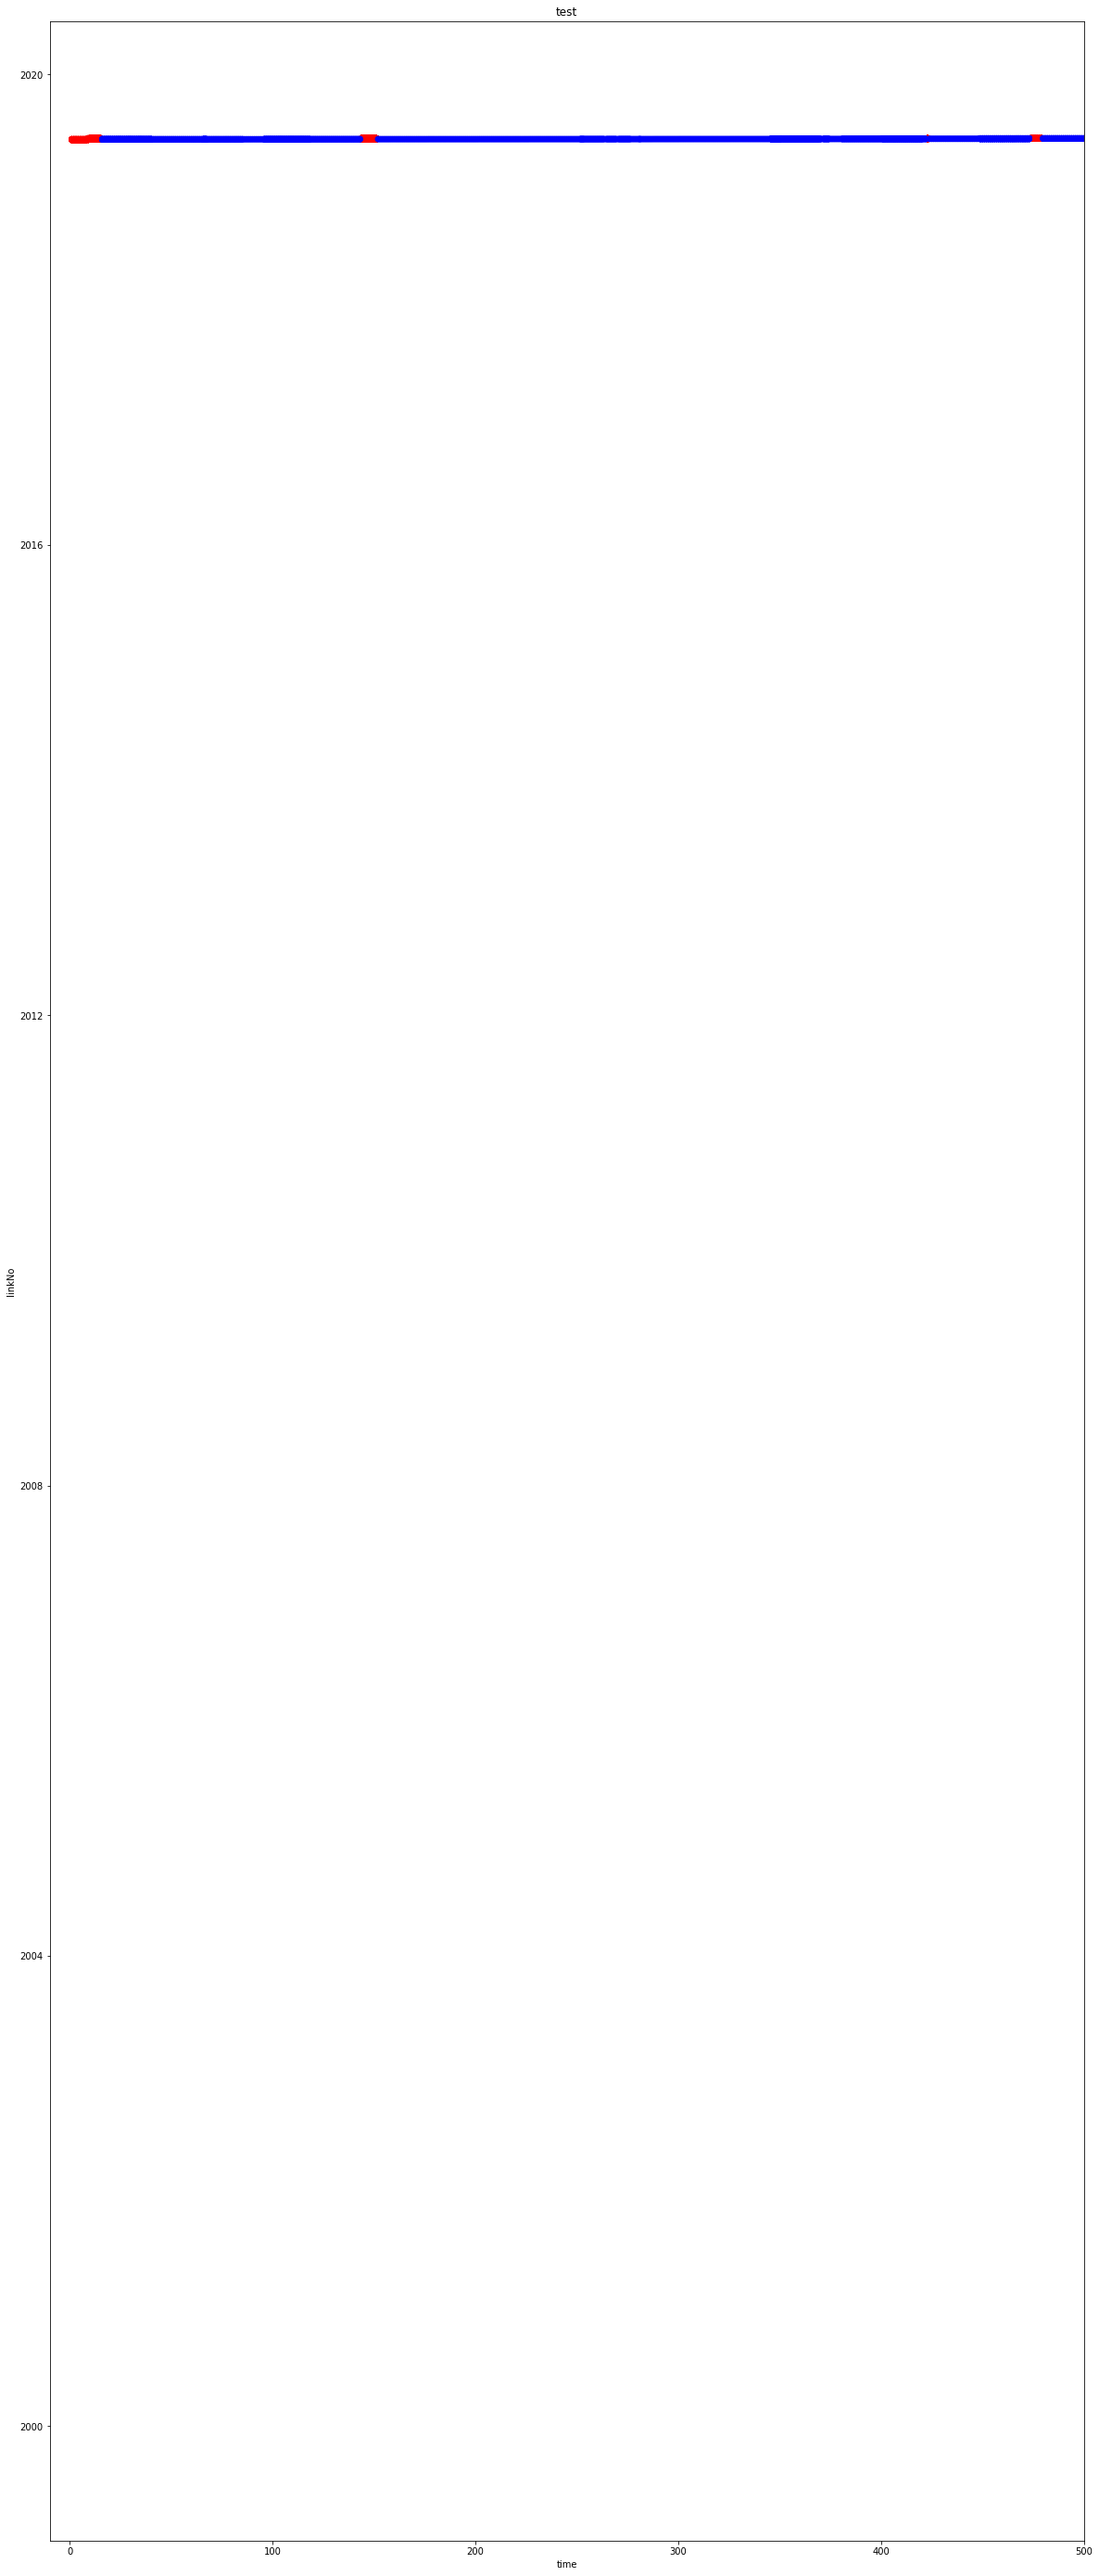

In [35]:

#y = res["timesaved"]
#x = res["link"]
minx, maxx = -10, 500
#miny, maxy = min(y), max(y)

## let's test plotting
plt.figure(0, figsize=(20, 50))
plt.title("test")
#plt.xticks(())
#plt.yticks(())
#print("{} {}".format(minx, maxx))
#print("{} {}".format(miny-21, maxy))
plt.xlim(minx, maxx)
#plt.ylim(miny, maxy)
plt.xlabel('time')
plt.ylabel('linkNo')
lables = set(data_for_plot)

#plt.format_xdata = mdates.DateFormatter('%m-%d')
    

#plt.scatter( res["timesaved"], res["link"], c=res["source"], label=set(res["label"]))
for i, l in enumerate(lables):
    print(data_for_plot[l][3::4])
    plt.scatter( data_for_plot[l][::4], data_for_plot[l][1::4],c=data_for_plot[l][2::4], \
                label=l,cmap=plt.cm.Set1_r)


leg = plt.legend(shadow=True, scatterpoints=3, fontsize="x-large", loc="upper center")
plt.show()

In [ ]:
# soon or later this has to run
